In [3]:
import os
if 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
#from nltk.corpus import stopwords

## Loading the data

In [4]:
ratings_df = pd.read_csv(
    "data/user_ratedmovies.dat", 
    sep='\t'
)
ratings_df.head()

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30


In [5]:
movies_df = pd.read_csv(
    "data/movies.dat",
    sep='\t',
    encoding='latin1'
)
actors_df = pd.read_csv(
    "data/movie_actors.dat",
    sep='\t',
    encoding='latin1'
)
countries_df = pd.read_csv(
    "data/movie_countries.dat",
    sep='\t',
    encoding='latin1'
)
directors_df = pd.read_csv(
    "data/movie_directors.dat",
    sep='\t',
    encoding='latin1'
)
genres_df = pd.read_csv(
    "data/movie_genres.dat",
    sep='\t',
    encoding='latin1'
)
locations_df = pd.read_csv(
    "data/movie_locations.dat",
    sep='\t',
    encoding='latin1'
)
tags_id_df = pd.read_csv(
    "data/movie_tags.dat",
    sep='\t',
    encoding='latin1'
)
tags_text_df = pd.read_csv(
    "data/tags.dat",
    sep='\t',
    encoding='latin1'
)

In [6]:
# Actors movie tags

actors_merged_df = movies_df[['id','title']]\
    .merge(actors_df[['movieID','actorName']], 
    left_on='id', 
    right_on='movieID'
    )
actors_merged_df['actorName'] = actors_merged_df['actorName']\
    .apply(lambda x : str (x))\
    .apply(lambda x : x.replace(' ', ''))
actors_merged_df = actors_merged_df.groupby(["id", "title"])\
    ['actorName']\
    .apply(lambda x: ' '.join(x))\
    .reset_index()
actors_merged_df

,id,title,actorName
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...
3,4,Waiting to Exhale,Leon AngelaBassett BrandonHammond DennisHaysbe...
4,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...
...,...,...,...
10169,65088,Bedtime Stories,TeresaPalmer AbigailLeoneDroeger AdamSandler A...
10170,65091,Manhattan Melodrama,AlThompson AlexMelesh BertRussell BertSprotte ...
10171,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...
10172,65130,Revolutionary Road,KathrynHahn DavidHarbour DylanBaker JayOSander...


In [7]:
type(actors_df['movieID'])

pandas.core.series.Series

In [8]:
type(actors_df[['movieID']])

pandas.core.frame.DataFrame

In [9]:
# Country movie tag

country_merged_df = actors_merged_df.merge(
    countries_df[['movieID','country']], 
    left_on='id', 
    right_on='movieID'
    )\
    .drop(columns='movieID')
country_merged_df

,id,title,actorName,country
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...,USA
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...,USA
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...,USA
3,4,Waiting to Exhale,Leon AngelaBassett BrandonHammond DennisHaysbe...,USA
4,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...,USA
...,...,...,...,...
10169,65088,Bedtime Stories,TeresaPalmer AbigailLeoneDroeger AdamSandler A...,USA
10170,65091,Manhattan Melodrama,AlThompson AlexMelesh BertRussell BertSprotte ...,USA
10171,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...,USA
10172,65130,Revolutionary Road,KathrynHahn DavidHarbour DylanBaker JayOSander...,USA


In [10]:
# Director movie tag

directors_merged_df = country_merged_df.merge(
    directors_df[['directorID','movieID']],
    left_on='id',
    right_on='movieID'
    )\
    .drop(columns='movieID')
directors_merged_df

,id,title,actorName,country,directorID
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...,USA,john_lasseter
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...,USA,joe_johnston
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...,USA,donald_petrie
3,4,Waiting to Exhale,Leon AngelaBassett BrandonHammond DennisHaysbe...,USA,forest_whitaker
4,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...,USA,charles_shyer
...,...,...,...,...,...
10129,65088,Bedtime Stories,TeresaPalmer AbigailLeoneDroeger AdamSandler A...,USA,adam_shankman
10130,65091,Manhattan Melodrama,AlThompson AlexMelesh BertRussell BertSprotte ...,USA,ws_van_dyke
10131,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...,USA,clark_gregg
10132,65130,Revolutionary Road,KathrynHahn DavidHarbour DylanBaker JayOSander...,USA,sam_mendes


In [11]:
genres_df

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
20804,65126,Comedy
20805,65126,Drama
20806,65130,Drama
20807,65130,Romance


In [12]:
# Genres movie tag

genres_merged_df = directors_merged_df.merge(
    genres_df,
    left_on='id',
    right_on='movieID'
    )\
    .drop(columns='movieID')
genres_merged_df = genres_merged_df.groupby(['id','title','actorName','country','directorID'])\
    ['genre']\
    .apply(lambda x : ' '.join(x))\
    .reset_index()
genres_merged_df

,id,title,actorName,country,directorID,genre
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...,USA,john_lasseter,Adventure Animation Children Comedy Fantasy
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...,USA,joe_johnston,Adventure Children Fantasy
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...,USA,donald_petrie,Comedy Romance
3,4,Waiting to Exhale,Leon AngelaBassett BrandonHammond DennisHaysbe...,USA,forest_whitaker,Comedy Drama Romance
4,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...,USA,charles_shyer,Comedy
...,...,...,...,...,...,...
10124,65088,Bedtime Stories,TeresaPalmer AbigailLeoneDroeger AdamSandler A...,USA,adam_shankman,Adventure Children Comedy
10125,65091,Manhattan Melodrama,AlThompson AlexMelesh BertRussell BertSprotte ...,USA,ws_van_dyke,Crime Drama Romance
10126,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...,USA,clark_gregg,Comedy Drama
10127,65130,Revolutionary Road,KathrynHahn DavidHarbour DylanBaker JayOSander...,USA,sam_mendes,Drama Romance


In [13]:
tags_id_df

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1
...,...,...,...
51790,65037,792,1
51791,65037,2214,1
51792,65126,5281,1
51793,65126,13168,1


In [14]:
tags_text_df

,id,value
0,1,earth
1,2,police
2,3,boxing
3,4,painter
4,5,whale
...,...,...
13217,16524,good in its day
13218,16525,isaiah
13219,16527,top 5 movie
13220,16528,vontatott


In [15]:
# Tags movie tag

tags_df = tags_id_df.merge(
    tags_text_df,
    left_on='tagID',
    right_on='id'
)

tags_merged_df = genres_merged_df.merge(
    tags_df[['tagID','value','movieID']],
    left_on='id',
    right_on='movieID'
    )\
    .drop(columns=['tagID','movieID'])
tags_merged_df['value'] = tags_merged_df['value']\
    .apply(lambda x : str(x))\
    .apply(lambda x: x.replace(' ',''))
tags_merged_df = tags_merged_df.groupby(['id','title','actorName','country','directorID','genre'])\
    ['value']\
    .apply(lambda x : ' '.join(x))\
    .reset_index()
tags_merged_df

,id,title,actorName,country,directorID,genre,value
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...,USA,john_lasseter,Adventure Animation Children Comedy Fantasy,funny timetravel timallen comedy fun fantasy p...
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...,USA,joe_johnston,Adventure Children Fantasy,timetravel fantasy animals children game robin...
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...,USA,donald_petrie,Comedy Romance,funniestmovies sequelfever jacklemmon walterma...
3,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...,USA,charles_shyer,Comedy,family sequelfever sequel remake wedding pregn...
4,6,Heat,AlPacino AmyBrenneman AshleyJudd BegoniaPlaza ...,USA,michael_mann,Action Crime Thriller,imdbtop250 witty want bibliothek robertdeniro ...
...,...,...,...,...,...,...,...
7110,64993,Byôsoku 5 senchimêtoru,AyakaOnoue KenjiMizuhashi SatomiHanamura Sator...,Japan,makoto_shinkai,Animation Drama Romance,drama japan love anime
7111,65006,Impulse,AngusMacfadyen C.EarnstHarth C.ErnstHarth Darr...,USA,charles_t_kanganis,Mystery Thriller,nudity(rear)
7112,65037,Ben X,GregTimmermans MarijkePinoy LauraVerlinden Maa...,Belgium,1190387-nic_balthazar,Drama,internet autism basedonnovel aspergerssyndrome
7113,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...,USA,clark_gregg,Comedy Drama,basedonbook chuckpalahniuk


## Bag of Words Model

In [101]:
tags_merged_df['bagOfWords'] = tags_merged_df[['title','country','genre','value']]\
    .apply(lambda x : ' '.join(x.dropna().astype(str)),
    axis=1
    )\
    .str.lower()
tags_merged_df['movieID'] = tags_merged_df['id']
tags_merged_df

,id,title,actorName,country,directorID,genre,value,bagOfWords,movieID
0,1,Toy story,AnniePotts BillFarmer DonRickles ErikvonDetten...,USA,john_lasseter,Adventure Animation Children Comedy Fantasy,funny timetravel timallen comedy fun fantasy p...,toy story usa adventure animation children com...,1
1,2,Jumanji,PeterBryant AdamHann-Byrd BebeNeuwirth BonnieH...,USA,joe_johnston,Adventure Children Fantasy,timetravel fantasy animals children game robin...,jumanji usa adventure children fantasy timetra...,2
2,3,Grumpy Old Men,Ann-Margret BuckHenry BuffySedlachek BurgessMe...,USA,donald_petrie,Comedy Romance,funniestmovies sequelfever jacklemmon walterma...,grumpy old men usa comedy romance funniestmovi...,3
3,5,Father of the Bride Part II,AnnWalker AnnieMeyers-Shyer AprilOrtiz B.D.Won...,USA,charles_shyer,Comedy,family sequelfever sequel remake wedding pregn...,father of the bride part ii usa comedy family ...,5
4,6,Heat,AlPacino AmyBrenneman AshleyJudd BegoniaPlaza ...,USA,michael_mann,Action Crime Thriller,imdbtop250 witty want bibliothek robertdeniro ...,heat usa action crime thriller imdbtop250 witt...,6
...,...,...,...,...,...,...,...,...,...
7110,64993,Byôsoku 5 senchimêtoru,AyakaOnoue KenjiMizuhashi SatomiHanamura Sator...,Japan,makoto_shinkai,Animation Drama Romance,drama japan love anime,byôsoku 5 senchimêtoru japan animation drama r...,64993
7111,65006,Impulse,AngusMacfadyen C.EarnstHarth C.ErnstHarth Darr...,USA,charles_t_kanganis,Mystery Thriller,nudity(rear),impulse usa mystery thriller nudity(rear),65006
7112,65037,Ben X,GregTimmermans MarijkePinoy LauraVerlinden Maa...,Belgium,1190387-nic_balthazar,Drama,internet autism basedonnovel aspergerssyndrome,ben x belgium drama internet autism basedonnov...,65037
7113,65126,Choke,AnjelicaHuston BijouPhillips BradWilliamHenke ...,USA,clark_gregg,Comedy Drama,basedonbook chuckpalahniuk,choke usa comedy drama basedonbook chuckpalahniuk,65126


In [102]:
merged_df = tags_merged_df[['movieID','title','bagOfWords']]
merged_df['word_index'] = range(0,len(merged_df))
merged_df

<ipython-input-102-dc494c9780c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['word_index'] = range(0,len(merged_df))


,movieID,title,bagOfWords,word_index
0,1,Toy story,toy story usa adventure animation children com...,0
1,2,Jumanji,jumanji usa adventure children fantasy timetra...,1
2,3,Grumpy Old Men,grumpy old men usa comedy romance funniestmovi...,2
3,5,Father of the Bride Part II,father of the bride part ii usa comedy family ...,3
4,6,Heat,heat usa action crime thriller imdbtop250 witt...,4
...,...,...,...,...
7110,64993,Byôsoku 5 senchimêtoru,byôsoku 5 senchimêtoru japan animation drama r...,7110
7111,65006,Impulse,impulse usa mystery thriller nudity(rear),7111
7112,65037,Ben X,ben x belgium drama internet autism basedonnov...,7112
7113,65126,Choke,choke usa comedy drama basedonbook chuckpalahniuk,7113


In [103]:
merged_df.to_csv("data/movieTags_df.csv")

In [104]:
merged_df = merged_df.set_index('movieID')

Text(3.674999999999997, 0.5, 'number of movies')

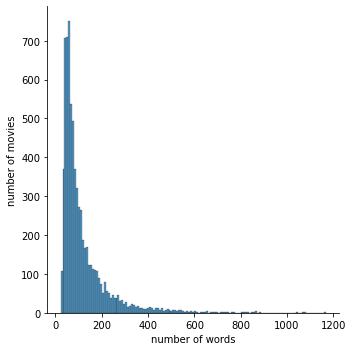

In [105]:
merged_df['bow_length'] = merged_df['bagOfWords']\
    .apply(lambda x : len(x))
sns.displot(merged_df, x='bow_length')
plt.xlabel("number of words")
plt.ylabel("number of movies")
#plt.xlim([0, 600])

## Vectorization using TfidfVectorizer

* Measures the originality of a word, by comparing the number of times it appears in a doc with the number of docs that contain this word

* Mathematically: $ Tf-Idf = Tf(t,d) \times Idf(t) $
* $Tf(t,d)$ is the term frequency, that means the number of times $t$ a word appears in a doc $d$
* $Idf(d)$ is the inverse document frequency, calculated by: $log \frac{1+n}{1+df(d,t)}+1$, where $n$ is the total number of documents and $df(d,t)$ is the number of documents with the term in it

* Useful links: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

Explain why using this method (considers if a word is rare (more meaningful) or not
https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
https://www.relataly.com/content-based-movie-recommender-using-python/4294/ 

#### Creating a Tf-idf vectorizer

In [106]:
tfidf_model = TfidfVectorizer(max_features=5000, analyzer='word', stop_words='english')
tfidf_vector = tfidf_model.fit_transform(merged_df['bagOfWords'])
print(type(tfidf_vector), tfidf_vector.shape)

<class 'scipy.sparse.csr.csr_matrix'> (7115, 5000)


In [117]:
text_size_mask = merged_df['bagOfWords']\
    .str\
    .split(' ')\
    .str\
    .len() > 10

merged_df[text_size_mask]

,title,bagOfWords,word_index,bow_length
movieID,,,,
1,Toy story,toy story usa adventure animation children com...,0,482
2,Jumanji,jumanji usa adventure children fantasy timetra...,1,215
3,Grumpy Old Men,grumpy old men usa comedy romance funniestmovi...,2,101
5,Father of the Bride Part II,father of the bride part ii usa comedy family ...,3,126
6,Heat,heat usa action crime thriller imdbtop250 witt...,4,263
...,...,...,...,...
64926,The Battle of Russia,the battle of russia usa documentary war usa n...,7104,199
64957,The Curious Case of Benjamin Button,the curious case of benjamin button usa drama ...,7106,159
64959,Divide and Conquer,divide and conquer usa documentary war usa nat...,7107,277


In [78]:
tfidf_vector_matrix = pd.DataFrame(
    tfidf_vector.toarray(), 
    index=merged_df.index
)
(tfidf_vector_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
movieID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
print(tfidf_model.get_feature_names()[1000:1020])

['comedymusical', 'comedyofmanners', 'comedyromance', 'comic', 'comicbook', 'comicbookadaption', 'comicbookie', 'comicbooks', 'comicsbased', 'comicsidekick', 'comingofage', 'communism', 'communists', 'communistwitchhunt', 'community', 'compassion', 'compassionate', 'compelling', 'competition', 'competitivesport']


#### Reducing matrix dimension using SVD

In [25]:
# svd = TruncatedSVD(n_components=3000)
# reduced_matrix = svd.fit_transform(tfidf_vector_matrix)

## Calculating Cosine Similarities

* Used to calculate how similar documents are, regardless their sizes
* Mathematically: measures the cosine of the angle between two vectors in a multi-dimensional space
* The vectors, in our case, are the arrays of our tfidf_vector_matrix for each movie

* The most similar the documents are, the higher is the cosine of its corresponding vectors, which varies from -1 (complete opposites documents) to 1 (the same documents)

* Useful links: https://www.machinelearningplus.com/nlp/cosine-similarity/ 

In [108]:
similarity = cosine_similarity(tfidf_vector_matrix)
(similarity)

array([[1.        , 0.10965343, 0.01657558, ..., 0.        , 0.02660272,
        0.01253571],
       [0.10965343, 1.        , 0.00364574, ..., 0.        , 0.00585117,
        0.00884967],
       [0.01657558, 0.00364574, 1.        , ..., 0.        , 0.0330654 ,
        0.07690062],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.01403458,
        0.02122676],
       [0.02660272, 0.00585117, 0.0330654 , ..., 0.01403458, 1.        ,
        0.06104862],
       [0.01253571, 0.00884967, 0.07690062, ..., 0.02122676, 0.06104862,
        1.        ]])

In [109]:
similarity_df = pd.DataFrame(
    similarity,
    index = merged_df.index,
    columns= merged_df.index
)

In [110]:
similarity_df

movieID,1,2,3,5,6,7,8,9,10,11,...,64942,64957,64959,64983,64990,64993,65006,65037,65126,65130
movieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.109653,0.016576,0.050761,0.064188,0.009526,0.073587,0.010131,0.033096,0.012170,...,0.000000,0.030307,0.017886,0.006016,0.011944,0.061257,0.011005,0.000000,0.026603,0.012536
2,0.109653,1.000000,0.003646,0.003283,0.002042,0.002095,0.199917,0.007152,0.023364,0.002677,...,0.000000,0.040170,0.003834,0.004247,0.008432,0.000000,0.007769,0.000000,0.005851,0.008850
3,0.016576,0.003646,1.000000,0.182767,0.003594,0.040878,0.008997,0.012592,0.000000,0.033672,...,0.038747,0.022771,0.006750,0.007478,0.014846,0.030702,0.013679,0.000000,0.033065,0.076901
5,0.050761,0.003283,0.182767,1.000000,0.003237,0.055661,0.008103,0.011340,0.053670,0.013622,...,0.000000,0.004155,0.006079,0.006735,0.013370,0.000000,0.012319,0.000000,0.029778,0.014032
6,0.064188,0.002042,0.003594,0.003237,1.000000,0.002066,0.005038,0.103595,0.039879,0.027170,...,0.000000,0.002584,0.003780,0.020150,0.008313,0.000000,0.036858,0.000000,0.005769,0.008725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64993,0.061257,0.000000,0.030702,0.000000,0.000000,0.035290,0.000000,0.000000,0.000000,0.039051,...,0.081585,0.038232,0.000000,0.026199,0.000000,1.000000,0.000000,0.021256,0.036091,0.129112
65006,0.011005,0.007769,0.013679,0.012319,0.036858,0.007861,0.019173,0.026834,0.031961,0.010043,...,0.000000,0.087269,0.014385,0.076684,0.031636,0.000000,1.000000,0.000000,0.021953,0.033203
65037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006420,...,0.013413,0.006286,0.000000,0.010188,0.000000,0.021256,0.000000,1.000000,0.014035,0.021227


In [118]:
similarity_df[4929	]\
    .sort_values()

movieID
8845     0.000000
25930    0.000000
2388     0.000000
5221     0.000000
5224     0.000000
           ...   
3669     0.161639
6687     0.162038
6689     0.166494
2642     0.314652
4929     1.000000
Name: 4929, Length: 7115, dtype: float64

In [119]:
merged_df.loc[[ 4929,2642] ]

,title,bagOfWords,word_index,bow_length
movieID,,,,
4929,Toy Story,toy story usa comedy richardpryor,3275,33
2642,Superman III,superman iii uk action adventure sci-fi franch...,1724,184


In [75]:
np.argsort(similarity[4306])

array([4055, 1818, 3947, ..., 3274, 5114, 4306], dtype=int64)

In [76]:
similarity[4306,8360]

IndexError: index 8360 is out of bounds for axis 1 with size 7115

In [100]:
toy_story = merged_df['title']\
    .str\
    .lower()\
    .str\
    .contains("toy story")

merged_df[toy_story]

,title,bagOfWords,word_index
movieID,,,
1,Toy story,usa adventure animation children comedy fantas...,0
3114,Toy Story,usa adventure animation children comedy fantas...,2063
4929,Toy Story,usa comedy richardpryor,3275


In [71]:
merged_df[merged_df['title'].str.contains("Shrek")]

,title,bagOfWords,word_index
movieID,,,
4306,Shrek,usa adventure animation children comedy fantas...,2876
8360,Shrek 2,usa adventure animation children comedy musica...,5144
53121,Shrek the Third,usa adventure animation children comedy fantas...,6659
64249,Shrek the Halls,usa adventure animation comedy fantasy movieto...,7088


In [70]:
merged_df['title'].str.contains("Shrek").sum()

4

In [57]:
merged_df.loc[[1,2924]]

,title,bagOfWords,word_index,bow_length
movieID,,,,
1,Toy story,USA Adventure Animation Children Comedy Fantas...,0,472
2924,Jui kuen II,Hong Kong Action Comedy martialarts jackiechan...,1915,67


In [38]:
similarity[1]

array([ 8.69595911e-02,  1.00000000e+00,  2.79355752e-03, ...,
       -4.99064349e-05,  1.57920113e-03,  3.30257984e-03])

In [37]:
reduced_matrix.shape

(7115, 3000)

In [30]:
similarity.shape

(7115, 7115)

## Generating Content-based Recommendation

#### Recommendation based on a single movie

In [ ]:
def get_recommendations(movie_title, n, cosine_sim=similarity):
    movie_id = movies_df\
        [movies_df.title==movie_title]\
        .id[0]
    similarity_scores_all = cosine_sim[movie_id-1]



In [35]:
movies_df[movies_df.title=='Toy story'].id[0]

1

In [32]:
movies_df

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104,26,...,25,4.7,26,6,20,23,3.5,108877,63,http://content6.flixster.com/movie/10/94/33/10...
10193,65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7,12,10,...,83,0,4,2,2,50,3.7,344,71,http://content9.flixster.com/movie/66/44/64/66...
10194,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135,73,...,54,4.9,26,8,18,30,3.3,13893,55,http://content6.flixster.com/movie/10/85/09/10...
10195,65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194,133,...,68,6.9,36,25,11,69,3.5,46044,70,http://content8.flixster.com/movie/10/88/40/10...
